In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('SaratogaHouses.csv')

In [3]:
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [4]:
dataset.shape

(1728, 17)

In [5]:
dataset.describe()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,864.500000,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,498.974949,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,1.000000,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,432.750000,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,864.500000,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,1296.250000,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,1728.000000,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [16]:
X = dataset['livingArea'].values
y = dataset['price'].values

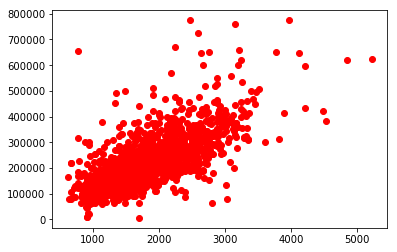

In [17]:
plt.plot(X,y,'ro')

In [18]:
# Calculate Slope and intercept
mean_x = np.mean(X)
mean_y = np.mean(y)

In [19]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2


In [20]:
slope = numer/denom

In [21]:
slope

113.1225418468094

In [22]:
intercept = mean_y - slope * mean_x

In [23]:
slope, intercept

(113.1225418468094, 13439.394004889764)

In [24]:
from scipy.stats import linregress

In [25]:
linregress(X,y)

LinregressResult(slope=113.12254184680961, intercept=13439.394004889386, rvalue=0.71239023342682384, pvalue=9.4862399396769931e-268, stderr=2.6823410034486286)

In [26]:
y_pred = []

for i in range(len(X)):
    pred = X[i] * slope + intercept
    y_pred.append(pred)

In [27]:
y[:10],y_pred[:10]

(array([132500, 181115, 109000, 155000,  86060, 120000, 153000, 170000,
         90000, 122900], dtype=int64),
 [115928.41691809907,
  234367.71823170851,
  233349.61535508724,
  233349.61535508724,
  108462.32915620966,
  143756.5622124142,
  324752.62916730921,
  201449.05855428698,
  198055.3822988827,
  173620.91325997186])

In [28]:
# Average Error - 
# MSE - Mean Square Error
# RMSE - Root Mean Squared Error
error = 0
for i in range(len(X)):
    error += (y[i] - y_pred[i]) ** 2

In [31]:
error = error/len(X)

In [32]:
avgError = np.sqrt(error)

In [33]:
avgError

69064.556517905643

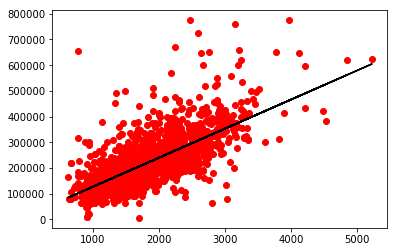

In [34]:
plt.plot(X,y,'ro')
plt.plot(X,y_pred,color='black')

In [37]:
# Prediction
newX = 906
newY = newX * slope + intercept

In [38]:
print(newY)

115928.416918
